# О наборе данных #
(взят с Kaggle)

Этот набор данных содержит твиты, опубликованные для различных услуг и продуктов, а также эмоции, содержащиеся в твите. Он содержит три столбца:

-tweet_text;

-emotion_in_tweet_is_directed_at;

-is_there_an_emotion_directed_at_a_brand_or_product.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('C:/Users/Александр/Projects/projects/Pet-projects/final_data.csv', encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [29]:
df.columns=['text','platform','emotion']  # изменим названия колонок для удобной работы
df.head()

,text,platform,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [30]:
df.info()  # выведем информацию о типах и столбцах индекса, ненулевых значения и использовании памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9092 non-null   object
 1   platform  3291 non-null   object
 2   emotion   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


**Обработаем нулевые значения**

<AxesSubplot:>

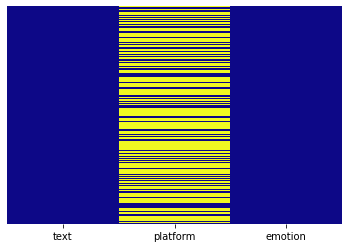

In [31]:
sns.heatmap(df.isnull(),cmap='plasma',cbar=False,yticklabels=False)

Видно, что большинство значений в столбце *platform* являются нулевыми и, следовательно, не дают хорошего понимания данных, поэтому будет лучше удалить столбец.

In [32]:
df.drop('platform',axis=1,inplace=True)  # удалим столбец platform из-за его неинформативности
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [33]:
df.isnull().sum() # видим пропуск в тексте

text       1
emotion    0
dtype: int64

In [34]:
df.dropna(inplace=True)  #удаляем пропуск

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   emotion  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


**Все нулевые значения были удалены из датасета, поэтому мы можем перейти к части предварительной обработки текста.**

# Предварительная обработка текста #

In [36]:
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


**Колонка emotion**

In [37]:
df['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [38]:
# отправим "I can't tell" к "No emotion toward brand or product"
df['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True) 

In [39]:
df['emotion'].value_counts()

No emotion toward brand or product    5544
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [40]:
# сопоставим типы эмоций с числовыми значенияем
# "Negative emotion" станет 0
# "No emotion toward brand or product" станет 1
# "Positive emotion" станет  2
df['emotion']=df['emotion'].map({"Negative emotion":0,"No emotion toward brand or product":1,"Positive emotion":2})

In [41]:
df['emotion'].value_counts()

1    5544
2    2978
0     570
Name: emotion, dtype: int64

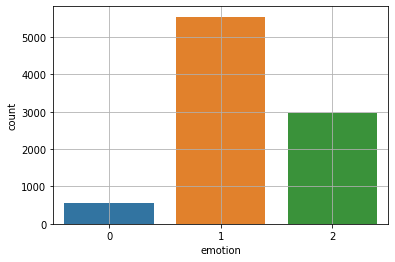

In [43]:
# на графике видим, что "No emotion toward brand or product" преобладает над остальными
sns.countplot(x='emotion',data=df)
plt.grid()

**Колонка text**

In [45]:
import re

In [46]:
# преобразуем текст к нижнему регистру для удобства работы
df['text']=df['text'].apply(lambda x:x.lower())

In [47]:
df.head()

,text,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [48]:
# удалим все ссылки из текста
df['text']=df['text'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))

In [49]:
# также удалим все неалфавитные значения
df['text']=df['text'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))

In [50]:
df.head()

,text,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [51]:
# исправим все неодинарные пробелы
df['text']=df['text'].apply(lambda x:" ".join(x.split()))

In [52]:
# добавим длинну для понимания длинны текста
df['length']=df['text'].apply(len)

In [53]:
df.head()

,text,emotion,length
0,wesley i have a g iphone after hrs tweeting at...,0,112
1,jessedee know about fludapp awesome ipad iphon...,2,132
2,swonderlin can not wait for ipad also they sho...,2,72
3,sxsw i hope this year s festival isn t as cras...,0,79
4,sxtxstate great stuff on fri sxsw marissa maye...,2,119


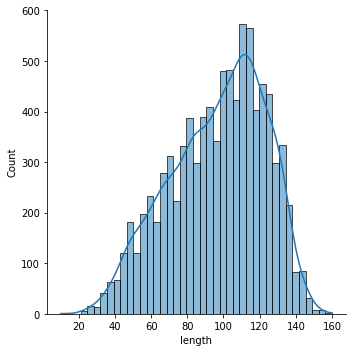

In [55]:
# распределение длинны сообщений
sns.displot(df['length'],kde=True)

<AxesSubplot:xlabel='emotion', ylabel='length'>

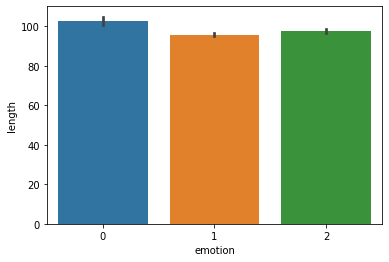

In [57]:
# отношение длины текста к эмоции
sns.barplot(x='emotion',y='length',data=df)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

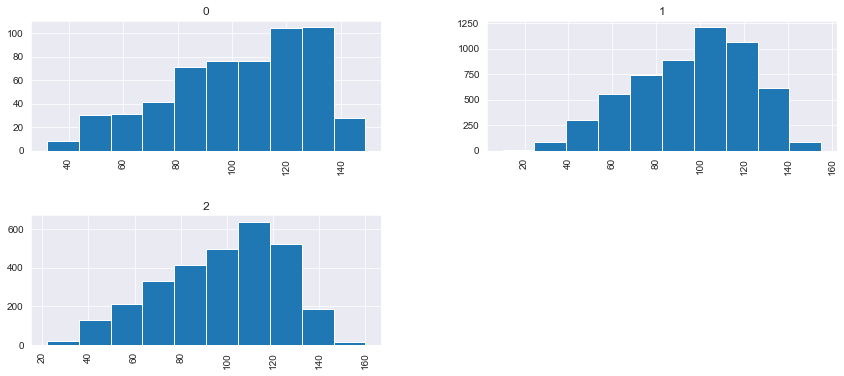

In [58]:
sns.set_style('darkgrid')
df.hist(column='length',by='emotion',figsize=(14,6))